<div align="center">
  <h1>Análise e Previsão de Rotatividade de Clientes</h1>
  <img src="https://capitalaberto.com.br/wp-content/uploads/2019/02/explicandoapp3-300x300.png"/>
</div>


Nessa tarefa, desejamos analisar quais atributos contribuem para um cliente abandonar o banco e diminuir a taxa de rotatividade de clientes, conhecida como **churn rate**. O **churn** é uma métrica que nos informa a quantidade de clientes que cancelam em um dado período de tempo, uma empresa que deseja expandir a base de clientes deve conseguir uma quantia de clientes que *exceda* a taxa de cancelamentos.

Assim o *churn rate é medido* como a relação entre total de clientes cancelados pelo total de clientes ativos, quanto menor essa taxa, melhor o lucro para empresa. Visto que manter um cliente é mais econômico que conseguir novos, é vantajoso para as empresas descobrir o que leva um cancelamento a fim de promover estratégias que visem manter o cliente.

Nessa tarefa, utilizamos um conjunto de dados de clientes de um banco contendo informações como pontuação de crédito, localização geográfica, idade, sexo, salário estimado, saldo, se o cliente abandonou o serviço etc. 

O *download* desse conjunto de dados pode ser baixado no Kaggle, seu nome é [Bank Turnover Dataset](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling/).


## Como reduzir o churn da empresa?

Algumas das estratégias para diminuir a taxa de abandono de clientes seria [(Fonte)](https://rockcontent.com/br/blog/churn-rate/):

1. Entender o porque dos clientes cancelam
2. Identicar clientes que possuem maior chance de saírem
3. Estruturar um time de Customer Success
4. Valorizar a experiência do cliente
5. Não deixar de ouvir os usuários do serviço
6. Alinhamento de expectativas
7. Tomar ações com base nas sugestões recebidas

Dado os pontos de como reduzir o *Churn*, nesse notebook iremos tentar explorar os dois primeiros pontos: 
- Por que os clientes cancelam? 
- Quais clientes possuem maior chance de sair?

Nessa tarefa iremos avaliar e investigar variáveis que podem influênciar no *Churn*, desse modo, levantamos as seguintes questões:

- Clientes com pontuação de cŕedito mais baixa tendem a sair?
- A localização geográfica afeta no cancelamento?
- O gênero influencia no abandono?
- Clientes mais jovens tendem a cancelar?
- Clientes com menos tempo de serviço tendem a cancelar?
- Clientes com saldo baixo tendem a sair?
- Quem não possui cartão de crédito sai mais?
- Membros que não são ativos saem mais?
- Clientes com salários mais baixo tendem a sair do banco?
- Clientes que possuem menos produtos saem mais?


Os principais objetivos desse notebook é:

1. Obter uma visão geral da organização do conjunto de dados
2. Fazer uma análise estatística de um subconjunto de pessoas que abandonaram e continuaram
3. Realizar uma análise exploratória de dados
4. Predizer se uma pessoa vai continuar ou cancelar o serviço

In [1]:
# Bibliotecas utilizadas
import shutil
from zipfile import ZipFile
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 17}) 

# 1. Visão Geral

O nosso conjunto de dados possui 10000 entradas com 14 colunas, havendo a nossa variável alvo de interesse (variável dependente) junto com outras variáveis independentes como gênero, idade, saldo e pontuação de crédito. Essas variáveis podem ser classificadas como **quantitativa** e **qualitativas**. 

  <img src="https://blog.fastformat.co/wp-content/uploads/2018/05/variaveisquantitativas_qualitativas-768x398.png" height="250"/>

Assim o nosso conjunto está dividido da seguinte maneira:

**Variáveis quantitativas**  - representadas por números resultantes de uma contagem
  - **Discreta** (representa conjunto finito/enumável de itens)
    * **NumOfProducts** (refere-se ao número de produtos que um cliente comprou por meio do banco)
      - 1
      - 2
      - 3
      - 4
    * **HasCrCard**
      - 0 (não)
      - 1 (sim)
    * **IsActiveMember**
      - 0 (não)
      - 1 (sim)
    * **Exited**
      - 0 (não)
      - 1 (sim)
  - **Contínua** 
    * **RowNumber** (Número único para cada amostra)
    * **CustomerId** (Identificador único de cada cliente)
    * **CreditScore**
    * **Age**
    * **Tenure** (número de anos que se é cliente do banco)
    * **Balance**
    * **EstimatedSalary**

**Variáveis Qualitativas** - representam qualidade (atributo) de um indivíduo
  - **Nominal**
    - **Surname**
    - **Geography**
      * France
      * Germany
      * Spain
    - **Gender**


Observação, a idade quando é avaliada por anos completos e não intervalos é considerada quantitativa contínua, desse modo em nossa análise, tanto `Age`, quanto `Tenure` são consideradas contínuas.

Caso queira ter uma visão geral dos dados, vá direto para a Subseção 1.3, onde geramos um relatório por meio da biblioteca `pandas_profilling`.

In [3]:
''' Copiar os dados

Os dados foram baixados e salvos em outro diretório, eles são movidos para o 
ambiente do notebook por meio da biblioteca shutil e renomeado para `teste.zip`.
Por fim, realizados a leitura dele como um objeto do tipo DataFrame, que 
escolhemos devido a natureza dessa classe em funcionar bem com dados tabulares.
'''
shutil.copy('/home/jessica/Desktop/dados_teste_pratico.zip', 'teste.zip')
zip_file = ZipFile('teste.zip')

with zip_file.open('dados_teste_pratico/Stats_ML/bank_customers.csv') as zf:
  df = pd.read_csv(zf)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


O conjunto de dados possui 10.000 clientes cadastrados e 14 colunas, onde nenhuma delas possui valores faltantes como podemos ver acima. 

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## 1.2 Visualização

De modo geral, necessitamos saber se nosso conjunto de dados possui valores faltantes e quão proporcional os dados se encontram distribuídos por algumas categorias. Dentre elas: `Geography`, `Gender` e `Exited`.


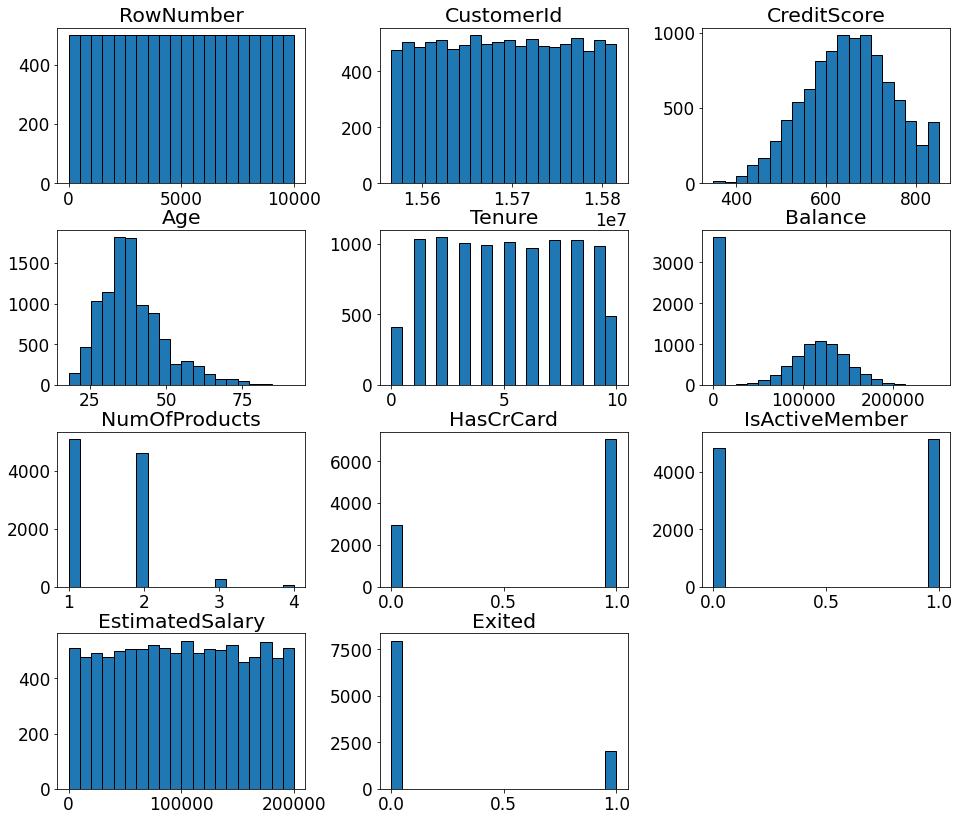

In [6]:
df.hist(bins=20, figsize=(16,14), edgecolor='black', grid=False)
plt.show()

Podemos notar uma distribuição uniforme presente nas colunas `RowNumber`, `CustomerID`, `Tenure` e `EstimatedSalary`, isso implica que esses 20 intervalos de valores são aproxidamente prováveis de ocorrer no conjunto de dados. Já as colunas `CreditScore`, `Age` e `Balance` tendem a uma distribuição normal. Analisando cada histograma percebemos que:

- `CreditScore` possui maior parte dos seus valores entre 600 e 700
- A maioria das idades dos clientes está entre  30 e 40 anos, há poucos clientes com mais de 50 anos.
- Há poucos clientes nos extremos de `Tenure`, 0 anos e 10 anos.
- A maioria dos clientes possui nenhum saldo.
- A maioria dos clientes possui no máximo dois produtos.
- A maioria dos clientes possui cartão de crédito.
- A quantidade de clientes que são membros ativos ou não são similares.
- Há uma quantidade aproximada de clientes para cada faixa de salário.
- A minoria dos clientes abandonam o banco.

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- O menor `ScoreCredit` é de 350 e o maior de 850, possuindo uma média de 650
  - 25\% são até 584
- O cliente mais novo tem 18 anos, o mais velho 92, a idade média é 39 anos
  - 75\% dos clientes possuem até 44 anos
- O cliente com mais tempo está a há 10 anos, o mais novo está há menos de um ano
  - 50\% dos clientes estão no máximo há 5 anos como cliente
- A média do saldo é de 76.485,89, sendo o maior saldo de 250.898,09
  - 25\% dos clientes não possuem saldo algum
- 75\% dos clientes possuem até dois produtos, a quantidade máxima de produtos é 4
- 25\% dos clientes não possuem cartão de crédito
- 25\% dos clientes não são membros ativos
- O salário estimado médio é de 100.090,24, o menor salário é 11,58 e o maior 199.992,48
- 75\% dos clientes continuam no banco

In [8]:
df.describe(include=[object])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Dentre as colunas do tipo *object*, possuímos 2932 nomes únicos sendo Smith o mais frequente, em Geography há três localizações cadastradas, sendo a mais frequente a França (aparece 5.014 vezes). Por fim, há dois gêneros, sendo a maioria dos clientes do sexo masculino (frequência de 5.457).

No geral, as colunas `RowNumber`, `CustomerId` e `Surname` não nos fornece informações sobre o risco de abando no cliente. A primeira é apenas uma sequência que representa o número da amostra, a segunda um ID aleatório gerado para propósitos de identificação e a última nos diz apenas qual é o sobrenome do usuário. Portanto, vamos remover essas colunas do nosso conjunto de dados antes de realizar análises mais específicas.

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

Utilizamos o gráfico de dispersão para verificar as relações de causa e efeito entre duas variáveis quantitativas. Desejamos descobrir como as variáveis do nosso conjunto se afetam e qual a intensidade entre suas relações. 

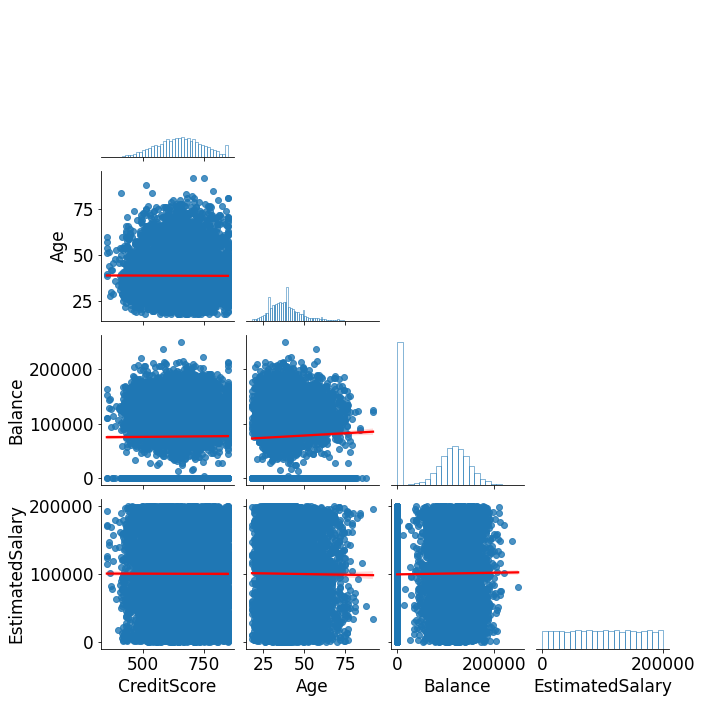

In [10]:
continuous_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
g = sns.pairplot(
    df[continuous_columns],
    kind='reg',
    plot_kws={'line_kws':{'color':'red'}},
    diag_kws=dict(fill=False),
    corner=True
)
plt.show()

Acima podemos notar que maioria da variáveis são fracamente correlacionadas, por exemplo, em `Balance` vs `Age` podemos notar uma tendência de aumento (aproximadamente), quando a idade aumenta os valores do saldo tendem a crescer. 

Há dois tipos de correlação, a positiva e a negativa, para visualizarmos melhor o quão correlacionadas são essas medidas utilizaremos o coeficiente de correlação de Pearson — também conhecido como *Pearson's r*. Esse coeficiente varia de -1.00 a +1.00. Quando há uma correlação positiva perfeita assume o valor de +1.00. Quando a correlação negativa é perfeita assume o valor de -1.00. Um valor igual a 0.00 indica que não existe correlação entre as variáveis.

Abaixo, vemos vários diagramas de dispersão e seus respectivos coeficientes de Pearson.

<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1200px-Correlation_examples2.svg.png"/>

<small>Imagem retirada de https://en.wikipedia.org/wiki/Correlation</small>
</div>

Abaixo mostramos uma tabela contendo os a interpretação dos valores do coeficiente de correlação de Pearson.

<div align="center">
<img src="https://minio.scielo.br/documentstore/1982-4351/pD8ZJN9LPWZjxyg9Nn7KSYQ/00a1935b704e192ea9d084bb90a8327a421142e9.jpg"/>

<small>Tabela retirada de https://doi.org/10.1590/0102-778620130079</small>
</div>

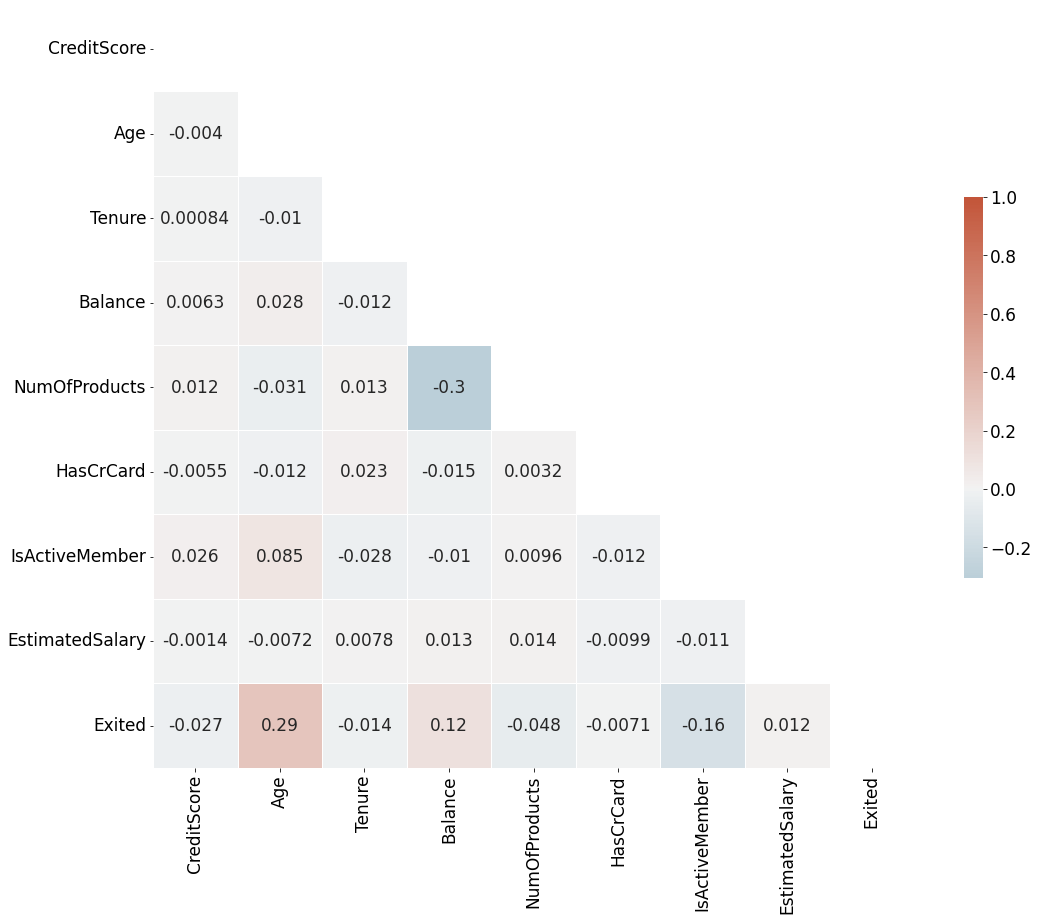

In [11]:
# Obtém a correlação entre as colunas numéricas de nosso conjunto
corr = df.corr()

# Gera uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define uma figura do matplotlib
f, ax = plt.subplots(figsize=(18, 14))

# Gera um colormap divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Desenha um heatmap com a máscara e a correta proporção
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

plt.show()

Através do gráfico acima, confirma-se que a maioria das colunas do nosso *dataset* possui correlação bem fraca, com exceção de `NumOfProducts` vs `Balance` e `Exited` vs `Age` que possuem correlação fraca.

A primeira nos diz que a medida que saldo cresce, o número de produtos decresce, já a segunda nos diz que `Age` vs `Exited` mostram tendência de crescimento.

## 1.3 Resumo da seção

Utilizamos a biblioteca `pandas_profilling` para mostrar uma visão geral do nosso conjunto de dados, essa ferramenta nos fornece algumas das informações realizadas nas subseções anteriores em um formato HTML.


In [12]:
ProfileReport(df, title='Pandas Profiling Report')

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


# 2. Visualização e relação entre variáveis

Nessa seção, iremos realizar a exploração entre as variáveis independentes com a nossa variável dependente (`Exited`), desejamos investigar as suposições que levantamos no início desse notebook.

- **ScoreCredit**: Quem tem crédito baixo sai mais do que os demais
- **Geography**: Quem mora em uma certa localização tende a abandonar mais do que os outros
- **Gender**: Pessoas de um determinado gênero abandonam mais
- **Age**: Clientes mais jovens tendem a abandonar mais que os mais velhos
- **Tenure**: Clientes com menos tempo de serviço abandonam mais
- **EstimatedSalary**: Clientes com salário mais baixo saem mais
- **HasCrCard**: Quem não possui cartão de crédito tende a sair mais
- **IsActiveMember**: Membros que não são ativos saem mais
- **NumOfProducts**: Clientes com menos produtos cancelam mais

In [13]:
# a coluna `Exited` é o nosso rótulo
categoric_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
continuous_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

## 2.1 Colunas categóricas

Dentre as colunas categóricas, possuímos: `Geography`, `Gender`, `HasCrCard`, `IsActiveMember` e `NumberOfProducts`. Para verificar a relação entre essas variáveis com `Exited` utilizaremos o *mosaic plot*. Esse gráfico é um tipo especial de gráfico de barras, ele é utilizado quando se deseja mostrar relacionamentos e fornece uma comparação visual entre os grupos [(fonte)](https://www.jmp.com/en_ch/statistics-knowledge-portal/exploratory-data-analysis/mosaic-plot.html). 

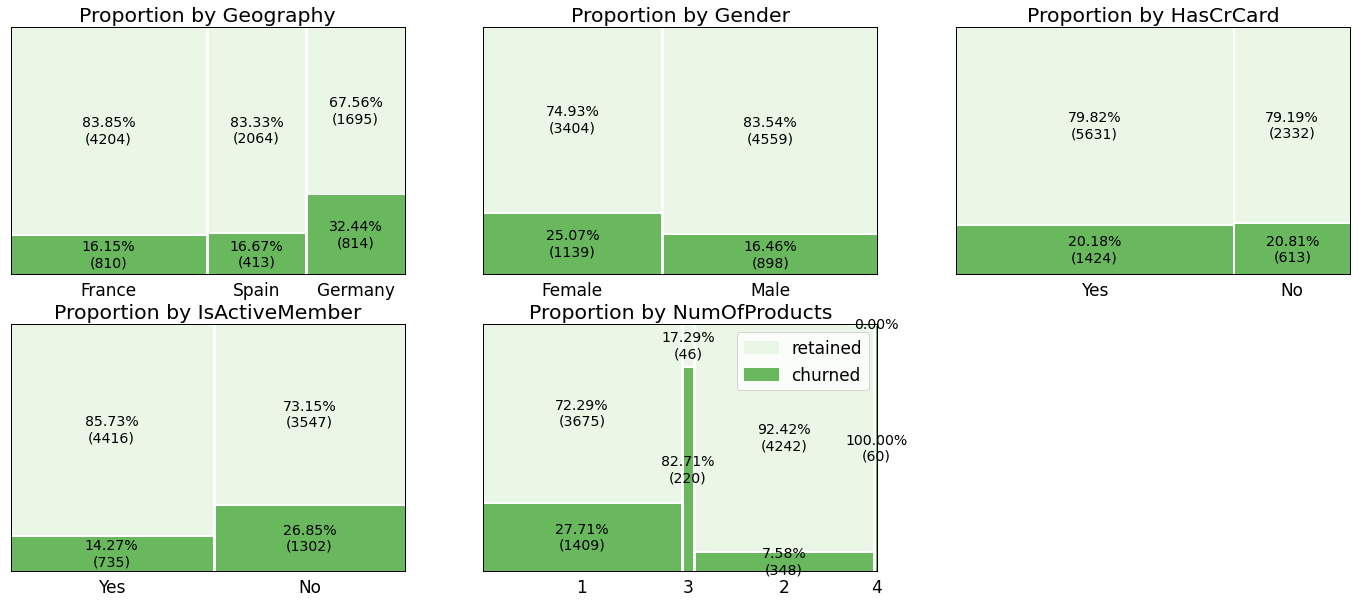

In [14]:
def plot_mosaic(df, colname, ax):
  data = df.copy()
  # reatribui os valores `No`  e Ỳes` para as variáveis lógicas
  if colname in ['HasCrCard', 'IsActiveMember']:
    data[colname] = data[colname].replace({0: 'No', 1: 'Yes'})


  grouped = data.groupby(['Exited', colname]).size()
  values = data[colname].unique()

  # define as configurações de como os dados serão mostrados
  colors = [
            {'facecolor':'#eaf7e6', 'edgecolor':'white'},
            {'facecolor':'#69b85e', 'edgecolor':'white'}
  ]
  props = {
      (str(key), str(exited)): colors[exited] 
      for exited, key in grouped.index
  }

  # exibe a porcentagem e quantidade de cada grupo na image
  labels = {}
  for exited in range(2):
    for key in values:
      count = grouped.get(exited).get(key)
      if count:
        labels[(str(key), str(exited))] = f'{(grouped.loc[exited, key] / grouped.loc[:,key].sum()) * 100:.2f}%\n({grouped.loc[exited, key]})'
      else:
        labels[str(key), str(exited)] = '0.00%'


  # desenha o gráfico de mosaico na tela
  mosaic(
      data=data,
      index=[colname, 'Exited'],
      labelizer=lambda k: labels[k],
      properties=props,
      title=f'Proportion by {colname}',
      ax = ax
  )

fig = plt.figure(figsize=(24, 10))
specs = gridspec.GridSpec(nrows=2, ncols=3, figure=fig)

for colname, spec in zip(categoric_columns, specs):
  ax = fig.add_subplot(spec)
  plot_mosaic(df, colname, ax)
  ax.set_yticklabels([])
  ax.tick_params(bottom=False, left=False)

plt.legend(
    handles=[
             mpatches.Patch(color='#eaf7e6', label='retained'),
             mpatches.Patch(color='#69b85e', label='churned')
    ]
)
plt.show()

No plot acima, mostramos a relação entre cada variável categórica com a variável `Exited` a qual atribuímos os *labels* *retained* para representar 0 e *churned* representado o valor 1. No primeiro *plot* notamos que há mais clientes que abandonaram na Alemanha (~32,44%) em comparação aos demais países. Apesar dos franceses terem abandonado mais (810) do que os espanhois (413), vemos que em ambos países a porcentagem de abandono é similar (Entre 16% e 17%).

No segundo gráfico, realizamos a comparação por gênero, no qual podemos notar que tanto em termos absoluto, quanto por categoria, as pessoas do sexo feminino tenderam a abandonar mais.

No terceiro gráfico, apesar de haver mais abandonos para quem possui cartão de crédito, notamos que em termos proporcionais a taxa de abandono é similar.

Os membros que não são ativos tendem a abandonar mais do que os membros ativos. No último gráfico todos os clientes que possuíam 4 produtos abandonaram, seguido por 82,71\% dos que possuíam 3 produtos.


### Resumo

- Clientes alemães tem desistido mais do que os demais
- Clientes do sexo feminino são as pessoas que mais abandonaram
- Membros não ativos abandonaram mais
- Quem possuía mais produtos abandonou mais

Os clientes que possuem 4 produtos, há 60 cadastrados, representam 0,6% do *dataset*. Já, aqueles que possuem 3 produtos, correspondiam cerca de 2,66% do total de usuários. Desse modo, é importante destacar que é difícil dizer que 3 ou mais produtos seja fator de abandono. Para se ter uma avaliação mais confiável seria necessário obter mais dados sobre esse conjunto específico.





## 2.2 Colunas numéricas

Agora vamos realizar nossa análise sobre as colunas numéricas que são `CreditScore`, `Age`, `Tenure`, `Balance` e `EstimatedSalary`.



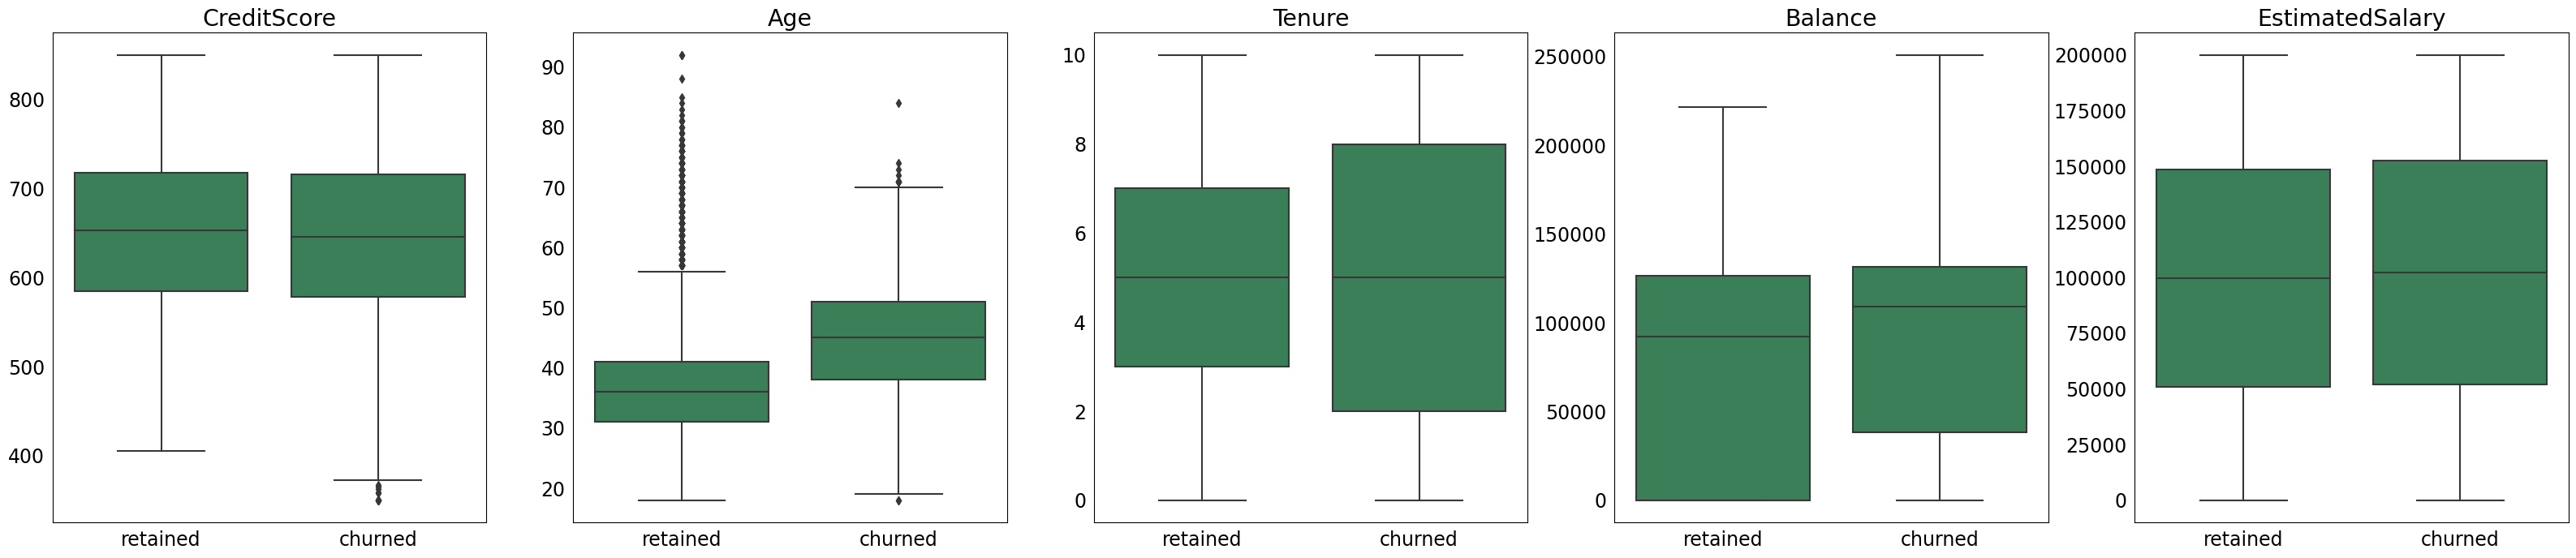

In [15]:
fig, axs = plt.subplots(1, 5, figsize=(40, 8), dpi=100)
# sns.set_palette(sns.color_palette(colors))
for ax, colname in zip(axs.flat, continuous_columns):
  sns.boxplot(y=colname,x = 'Exited', data = df, ax=ax, color='seagreen')
  ax.tick_params(bottom=False, left=False)
  ax.set_xticklabels(['retained', 'churned'])
  ax.set_title(colname)
  ax.set_xlabel("")
  ax.set_ylabel("")
  # for key, spine in ax.spines.items():
  #   spine.set_visible(False)
plt.show()

Com base nos *boxplots*, podemos notar os seguintes padrões:

Aparentemente o `CreditScore` e `EstimatedSalary` não influenciam tanto na decisão do cliente de sair.  A coluna `Age` mostra ter relação com o abandono, vemos que clientes com mais idade tem saído mais. Com relação ao `Tenure`, notamos que clientes que continuam e saem possuem distribuição similar. Entretanto, ao investigar os extremos, notamos que clientes com maior tempo e menor tempo de fidelidade tem abandonado mais. Por fim, em `Balance` é notável que um parcela daqueles com maior saldo tem saído.

# 3. Classificação

A tarefa de descobrir se uma pessoa vai abandonar pode ser vista como um problema de classificação, mas especificamente classificação binária. Nesse cenário, desejamos saber se um cliente **vai abandonar** ou **não vai abandonar**. Há diversos tipos de algoritmos utilizados para problemas de classificação, algum dos mais populares que escolhemos explorar são:

- *Linear classifier*:  *logistic regression*
- *SVM*
- *Boosted trees classifier* (XGBoost)


Podemos notar que nosso conjunto de dados se encontra com as classes desbalanceadas, há 3x mais clientes que continuam do que clientes que abandonam. Nessa situação, caso o classificador preveja 0 para todas as classes, a acurácia é de aproximadamente 80\%.

\begin{align}
    accuracy =  \frac{TP + TN}{TP + TN + FP + FN} \\
    accuracy =  \frac{7963}{10000} = 0.7963
\end{align}

Desse modo, precisamos ter uma estratégia que nos permita:
- aumentar a taxa de verdadeiros positivos $$ precision =\dfrac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$
- minimizar a taxa de falsos negativos $$ recall =\dfrac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

Outra métrica que utilizaremos é o *F1 Score* que é definida como:

\begin{align}
    F1 =  2 \times \frac{TPR \times TNR}{TNR + TPR} 
\end{align}

A partir do F1, podemos ter um balanço entre o *recall* e a *precision*. Sendo que nosso objetivo é evitar a perca de clientes, logo a métrica que almejamos aumentar mais é o *recall*.



In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

from imblearn.pipeline import make_pipeline as imbl_pipe
from imblearn.over_sampling import SMOTE

### 3.1 Divisão dos dados

Definimos a divisão dos dados na proporção 70% para treino e 30% para teste, desse modo teremos 7000 exemplos para o treinamento e avaliação será feita nos 3000 restantes.

In [17]:
# Extrair os valores e o label
X = df.loc[:, ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography', 'Gender']]
y = df.loc[:, 'Exited']
X['Geography'] = X['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
X['Gender'] = X['Gender'].map({'Female': 0, 'Male': 1})


X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(7000, 10)
(3000, 10)


Após ter nosso conjunto de  dividido em treino e teste realizamos a seleção de parâmetros para os nosso classificadores. Para a seleção de parâmetros utilizamos o *GridSearch* e definimos um intervalo de parâmetros onde a busca será realizada. 

Realizamos a operação em cima dos dados sem balanceamento e com balanceamento. Para lidar com o não balanceamento dos dados utilizamos a biblioteca imblearn.

### 3.2 Sem balanceamento




#### Regressão logística

In [19]:
# regressão logística
clf = make_pipeline(MinMaxScaler(), LogisticRegression())

param_grid={
    "logisticregression__C":np.logspace(-10,3,10), 
    "logisticregression__penalty":["l2"]
}

# clf = LogisticRegression()
grid = GridSearchCV(clf, param_grid, verbose=3, n_jobs=8, scoring="f1")

grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END logisticregression__C=1e-10, logisticregression__penalty=l2;, score=0.000 total time=   0.2s
[CV 2/5] END logisticregression__C=1e-10, logisticregression__penalty=l2;, score=0.000 total time=   0.2s
[CV 3/5] END logisticregression__C=2.7825594022071257e-09, logisticregression__penalty=l2;, score=0.000 total time=   0.1s
[CV 1/5] END logisticregression__C=2.7825594022071257e-09, logisticregression__penalty=l2;, score=0.000 total time=   0.2s[CV 2/5] END logisticregression__C=2.7825594022071257e-09, logisticregression__penalty=l2;, score=0.000 total time=   0.2s

[CV 5/5] END logisticregression__C=1e-10, logisticregression__penalty=l2;, score=0.000 total time=   0.2s
[CV 1/5] END logisticregression__C=1e-10, logisticregression__penalty=l2;, score=0.000 total time=   0.2s
[CV 4/5] END logisticregression__C=1e-10, logisticregression__penalty=l2;, score=0.000 total time=   0.2s
[CV 5/5] END logisticregression__C=2.782

GridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=8,
             param_grid={'logisticregression__C': array([1.00000000e-10, 2.78255940e-09, 7.74263683e-08, 2.15443469e-06,
       5.99484250e-05, 1.66810054e-03, 4.64158883e-02, 1.29154967e+00,
       3.59381366e+01, 1.00000000e+03]),
                         'logisticregression__penalty': ['l2']},
             scoring='f1', verbose=3)

In [20]:
grid.best_params_, grid.best_score_

({'logisticregression__C': 35.93813663804626,
  'logisticregression__penalty': 'l2'},
 0.2725258795950355)

In [21]:
# regressão logística
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.17      0.27       584

    accuracy                           0.82      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.79      0.82      0.77      3000



#### SVM

In [22]:
# svm
clf = make_pipeline(MinMaxScaler(), SVC(random_state=0))

param_grid = {
    'svc__kernel' : ['linear', 'rbf', 'poly'],
    'svc__C': [0.01, 0.1, 0.5],
    'svc__gamma': [0.1, 1, 5]
}

grid = GridSearchCV(clf, param_grid, verbose=3, n_jobs=8, scoring="f1")

grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 2/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=linear;, score=0.000 total time=   1.1s
[CV 1/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=linear;, score=0.000 total time=   1.2s
[CV 5/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=linear;, score=0.000 total time=   1.3s
[CV 3/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=linear;, score=0.000 total time=   1.3s
[CV 4/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=linear;, score=0.000 total time=   1.3s
[CV 3/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=rbf;, score=0.000 total time=   2.0s
[CV 1/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=rbf;, score=0.000 total time=   2.1s
[CV 2/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=rbf;, score=0.000 total time=   2.3s
[CV 3/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=poly;, score=0.000 total time=   1.2s
[CV 1/5] END svc__C=0.01, svc__gamma=0.1, svc__kernel=poly;, score=0.000 total time=   1.5s
[CV 2/5] EN

GridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC(random_state=0))]),
             n_jobs=8,
             param_grid={'svc__C': [0.01, 0.1, 0.5], 'svc__gamma': [0.1, 1, 5],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='f1', verbose=3)

In [23]:
grid.best_params_, grid.best_score_

({'svc__C': 0.5, 'svc__gamma': 5, 'svc__kernel': 'poly'}, 0.4978890543166809)

In [24]:
# svm
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2416
           1       0.86      0.36      0.51       584

    accuracy                           0.86      3000
   macro avg       0.86      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



In [25]:
# svm
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2416
           1       0.86      0.36      0.51       584

    accuracy                           0.86      3000
   macro avg       0.86      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



#### XGBoost

In [ ]:
# XGBoost
clf = make_pipeline(MinMaxScaler(), XGBClassifier())

param_grid = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5]
        }

grid = GridSearchCV(clf, param_grid, verbose=3, n_jobs=8, scoring="f1")

grid.fit(X_train, y_train)

In [ ]:
grid.best_params_, grid.best_score_

({'xgbclassifier__colsample_bytree': 0.6,
  'xgbclassifier__gamma': 1,
  'xgbclassifier__max_depth': 5,
  'xgbclassifier__min_child_weight': 10,
  'xgbclassifier__subsample': 0.8},
 0.589990264129503)

In [ ]:
#xgboost
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.47      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000



### 3.3 Com balanceamento

#### Regressão logística

In [ ]:
# regressão logística
clf_s = imbl_pipe(
    MinMaxScaler(),
    SMOTE(sampling_strategy='auto', random_state=0),
    LogisticRegression()
)

param_grid = {
    "logisticregression__C":np.logspace(-10,3,10), 
    "logisticregression__penalty":["l2"]
}

grid_s = GridSearchCV(clf_s, param_grid, verbose=3, n_jobs=8, scoring="f1")

grid_s.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=0, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('logisticregression',
                                        LogisticR...
                                verbose=False),
             iid='deprecated', n_jobs=2,
             

In [ ]:
grid_s.best_params_, grid_s.best_score_

({'logisticregression__C': 35.93813663804626,
  'logisticregression__penalty': 'l2'},
 0.48811119119971985)

In [ ]:
y_pred = grid_s.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.68      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.69      0.63      3000
weighted avg       0.80      0.70      0.73      3000



#### SVM

In [ ]:
# svm
clf_s = imbl_pipe(
    MinMaxScaler(),
    SMOTE(sampling_strategy='auto', random_state=0),
    SVC()
)

param_grid = {
    'svc__kernel' : ['linear', 'rbf', 'poly'],
    'svc__C': [0.01, 0.1, 0.5],
    'svc__gamma': [0.1, 1, 5]}

grid_s = GridSearchCV(clf_s, param_grid, verbose=3, n_jobs=8, scoring="f1")

grid_s.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   58.8s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 135 out of 135 | elapsed:  9.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=0, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('svc',
                                        SVC(C=1.0, break_ties=Fal...
                                            decision_function_shape='ovr',
                          

In [ ]:
grid_s.best_params_, grid_s.best_score_

({'svc__C': 0.1, 'svc__gamma': 5, 'svc__kernel': 'poly'}, 0.5708676743855772)

In [ ]:
y_pred = grid_s.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2416
           1       0.43      0.73      0.54       584

    accuracy                           0.76      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.83      0.76      0.78      3000



#### XGBoost

In [ ]:
# xgboost
clf_s = imbl_pipe(
    MinMaxScaler(),
    SMOTE(sampling_strategy='auto', random_state=0),
    XGBClassifier()
)

param_grid = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5]
}

grid_s = GridSearchCV(clf_s, param_grid, verbose=3, n_jobs=8, scoring="f1")

grid_s.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   46.6s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:  3.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 1148 tasks      | elapsed:  7.4min
[Parallel(n_jobs=2)]: Done 1564 tasks      | elapsed: 10.5min
[Parallel(n_jobs=2)]: Done 2025 out of 2025 | elapsed: 14.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=0, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('xgbclassifier',
                                        XGBClassifier(...
                                                      verbosity=1))],
                                

In [ ]:
grid_s.best_params_, grid_s.best_score_

({'xgbclassifier__colsample_bytree': 1.0,
  'xgbclassifier__gamma': 1,
  'xgbclassifier__max_depth': 4,
  'xgbclassifier__min_child_weight': 10,
  'xgbclassifier__subsample': 0.8},
 0.6270526744163835)

In [ ]:
y_pred = grid_s.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2416
           1       0.59      0.62      0.61       584

    accuracy                           0.84      3000
   macro avg       0.75      0.76      0.75      3000
weighted avg       0.85      0.84      0.84      3000



### 3.4 Salvar melhor modelo

In [19]:
import pickle

best_model = imbl_pipe(
    MinMaxScaler(),
    SMOTE(sampling_strategy='auto', random_state=0),
    SVC(C=0.1, gamma=5, kernel='poly', probability=True)
).fit(X_train, y_train)

pickle.dump(best_model, open('predict_churn.pkl', 'wb'))

### 3.5 conclusão da seção

O modelo que conseguiu melhorar o f1-score, no geral, foi o XGBoost com balanceamento que manteve um maior equilíbrio entre o *recall* e a *precision*. Dentre eles, o que obteve melhor *recall* foi o SVM com balanceamento que foi salvo para ser utilizado em tarefas futuras. 